### Importing requierd Libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

### Detect CUDA Availability and Set Device for Google Colab

In [ ]:
torch.cuda.is_available()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load and Transform Image Dataset for PyTorch Classification

> The dataset comprises of 7 classes and it includes images of bikes, cars, horses, cats, dogs, flowers, and humans.




In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/KaggelDataset/data',transform=transform)

testloader = torch.utils.data.DataLoader(dataset,shuffle=True, num_workers=2)


In [ ]:
print(dataset)
# print(trainloader)

# for inputs, labels_batch in trainloader:
#   print("inputs ",inputs,"    labels_batch ",labels_batch,"\n")

# print(trainloader)


Dataset ImageFolder
    Number of datapoints: 1803
    Root location: /content/drive/MyDrive/KaggelDataset/data
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


###Examine AlexNet Architecture Using PyTorch Summary Tool

In [ ]:
import torchvision.models as models
import torch.nn as nn
from torchsummary import summary
# Load pre-trained AlexNet
alexnet = models.alexnet(pretrained=True)

# Remove the last classification layer
alexnet_features = nn.Sequential(*list(alexnet.classifier.children())[:-1])
alexnet.classifier = alexnet_features

# summary(alexnet_features,(3,224,224))
summary(alexnet,(3,224,224))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 92.0MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

###Function for Extract features using the modified AlexNet

In [ ]:
# Extract features using the modified AlexNet
def extract_features(model, dataloader):
    model.eval()
    features = []
    labels = []
    with torch.no_grad():
        for inputs, labels_batch in dataloader:
            features_batch = model(inputs)
            features.append(features_batch.squeeze())
            labels.append(labels_batch)
    # features = torch.cat(features)
    # labels = torch.cat(labels)
    return features, labels

features,labels = extract_features(alexnet, testloader)

In [ ]:
# print(features)
print(len(features))
# len(features[0])
# len
print(len(labels))

1803
1803


###Train **Support Vector Machine** (**SVM**) Classifier on Extracted Features and Evaluate Performance

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Accuracy: 0.9695290858725761
[[71  2  0  0  0  0  0]
 [ 2 90  0  0  0  0  0]
 [ 0  0 39  3  0  0  0]
 [ 0  0  1 33  0  0  0]
 [ 0  0  0  0 46  0  0]
 [ 0  0  0  0  0 32  1]
 [ 0  0  0  0  0  2 39]]


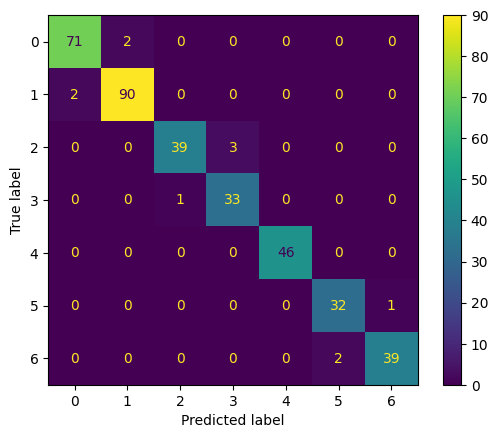

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Step 5: Train a classifier using the extracted features
# X_train, X_test, y_train, y_test = train_test_split(features.numpy(), labels.numpy(), test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Using SVM as the classifier
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Step 6: Evaluate the classifier
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()
plt.show()

In [ ]:
# X_train.shape
len(y_test)
len(y_pred)

361

###Train **Logistic Regression** Classifier on Extracted Features and Evaluate Performance

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Accuracy: 0.9722991689750693
[[70  3  0  0  0  0  0]
 [ 0 92  0  0  0  0  0]
 [ 0  0 39  2  1  0  0]
 [ 0  0  1 32  0  1  0]
 [ 0  0  0  0 46  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  0  0  0  0  2 39]]


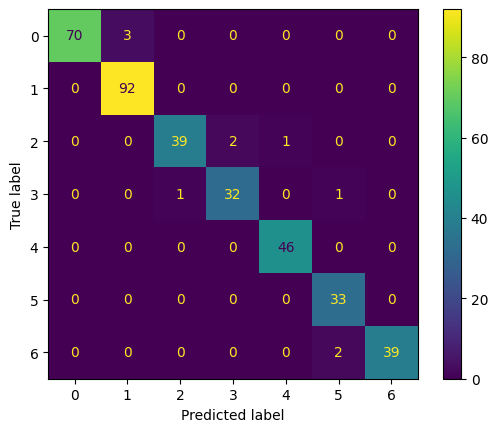

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 5: Train a classifier using the extracted features
# X_train, X_test, y_train, y_test = train_test_split(features.numpy(), labels.numpy(), test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Using Logistic Regression as the classifier
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

# Step 6: Evaluate the classifier
y_pred = logistic_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

confusion_matrix_result = confusion_matrix(y_test, y_pred)
print(confusion_matrix_result)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
disp.plot()
plt.show()
